# Decision_Tree Algorithm

In [1]:
#importing Libraries 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#Loading The PIMA Indian Diabetes dataset and Pre-Processing

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Finding Missing Value

In [4]:
data.isnull().values.any()

False

#Removing records with non-zero Insulin Attribute

In [5]:
data.drop(data[data['Insulin'] > 0].index, inplace = True) # droping the rows of people who already take insulin
#data = data.drop("Insulin", axis='columns')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               374 non-null    int64  
 1   Glucose                   374 non-null    int64  
 2   BloodPressure             374 non-null    int64  
 3   SkinThickness             374 non-null    int64  
 4   Insulin                   374 non-null    int64  
 5   BMI                       374 non-null    float64
 6   DiabetesPedigreeFunction  374 non-null    float64
 7   Age                       374 non-null    int64  
 8   Outcome                   374 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.2 KB


#Correlation Matrix to check the relationship between attributes and find out the most and least correlated attributes

<AxesSubplot:>

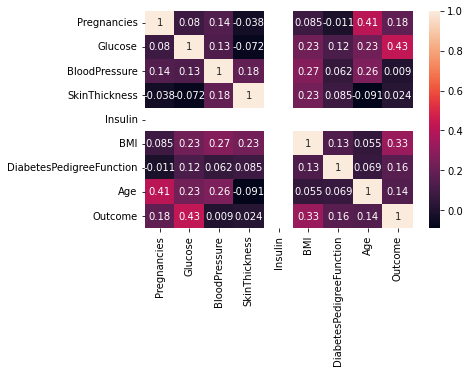

In [8]:
sns.heatmap(data.corr(),annot = True)

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.080393,0.140104,-0.038071,NaN,0.084547,-0.011130,0.409821,0.179527
Glucose,0.080393,1.000000,0.132263,-0.071864,NaN,0.225404,0.122815,0.227916,0.426842
BloodPressure,0.140104,0.132263,1.000000,0.183436,NaN,0.273734,0.062368,0.256583,0.008981
SkinThickness,-0.038071,-0.071864,0.183436,1.000000,NaN,0.232953,0.085492,-0.090509,0.023583
Insulin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,0.084547,0.225404,0.273734,0.232953,NaN,1.000000,0.134007,0.054982,0.327469
DiabetesPedigreeFunction,-0.011130,0.122815,0.062368,0.085492,NaN,0.134007,1.000000,0.068771,0.164146
Age,0.409821,0.227916,0.256583,-0.090509,NaN,0.054982,0.068771,1.000000,0.140380
Outcome,0.179527,0.426842,0.008981,0.023583,NaN,0.327469,0.164146,0.140380,1.000000


#Dropping features one at a time with lowest correlation to check if it affects accuracy

In [10]:
x =data[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']]

#x = data[['Pregnancies','Glucose','SkinThickness','BMI','DiabetesPedigreeFunction','Age']] # BloodPressure drp
#x = data[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']] #SkinThickness drp
#x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction',]] # Age drp
#x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Age']] #'DiabetesPedigreeFunction' drp
#x = data[['Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']] # Pregnancies drp

y = data['Outcome']

#Dividing the dataset into training and testing

In [11]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0 , shuffle = False)

In [12]:
# defining the Decision Tree classifier 

decision_clf = DecisionTreeClassifier(random_state = 0)

In [13]:
# passing training set to decision classifier

decision_clf.fit(x_train , y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
print(decision_clf)

DecisionTreeClassifier(random_state=0)


In [15]:
# using trained classifier on testing set for prediction

y_pred = decision_clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test , y_pred))

Accuracy :  0.6


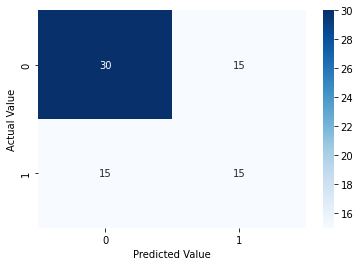

In [16]:
# Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred,labels = [0 ,1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

#print('confusion metrics :', metrics.confusion_matrix(y_test,y_pred)) #confusion metrics

In [17]:
# calculating recall

recall =  recall_score(y_test, y_pred)
print(f"Recall score is :{recall}")

Recall score is :0.5


In [20]:
# calculating Precision

precision =  precision_score(y_test, y_pred)
print(f"Precision score is :{precision}")

Precision score is :0.5


In [21]:
# calculating F1 Score

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 score is :{f1_score}")

F1 score is :0.5
